In [1]:
##dependencies
from PIL import Image
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


    

In [66]:
##Import files
##Chessboard images
chessboard = []
for filename in glob.glob('camera_cal/*.jpg'):
    img = cv2.imread(filename,-1)
    chessboard.append(img)

##test_images  
test_images=[]
for filename in glob.glob('test_images/*.jpg'):
    img = cv2.imread(filename,-1)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    test_images.append(img)
    
output = 'output_images/'



# Calibrating the Camera

True

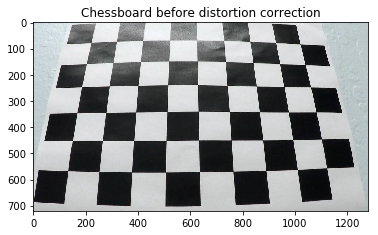

In [69]:
###Chessboard before distortion correction
plt.imshow(chessboard[13])
plt.title("Chessboard before distortion correction")
cv2.imwrite(output+'Chessboard.png',chessboard[13])

In [70]:
###Calibrate camera with chessboard images

##object point preparation
nx = 9
ny = 6

objpoints=[]
imgpoints = []

objp = np.zeros((6*9,3),np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)


for image in chessboard:
    
    #Convert to grayscale
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    ##Find chessboard corners
    ret, corners = cv2.findChessboardCorners(gray,(nx,ny),None)
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        
        

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,imgpoints,gray.shape[::-1],None,None)


  

# Undistorting the chessboard images

In [71]:
##Function for undistroting images
def undistort(img):
    return cv2.undistort(img,mtx,dist,None,mtx)

chessboard_undistorted = []
for img in chessboard:
    chessboard_undistorted.append(undistort(img))
    

(-0.5, 1279.5, 719.5, -0.5)

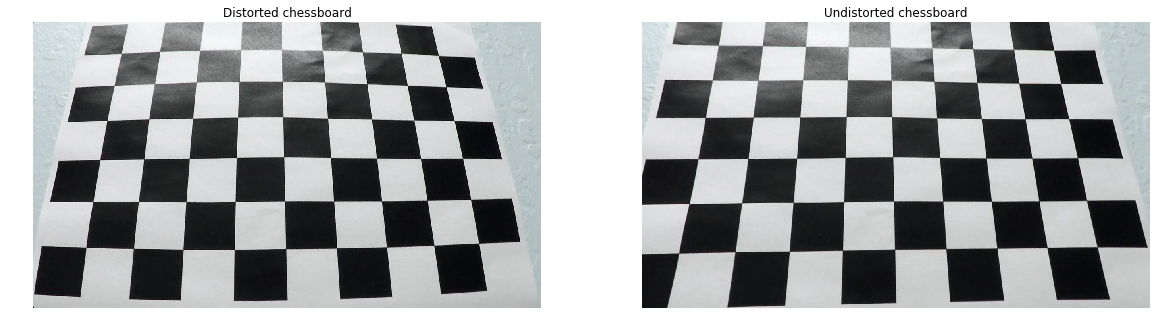

In [72]:
###Image of a undistorted chessboard
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title("Distorted chessboard")
plt.imshow(chessboard[13])
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Undistorted chessboard")
plt.imshow(chessboard_undistorted[13])
cv2.imwrite(output+'Undistorted_Chessboard.png',chessboard_undistorted[13])
plt.axis("off")

# Undistorting the test_images

(-0.5, 1279.5, 719.5, -0.5)

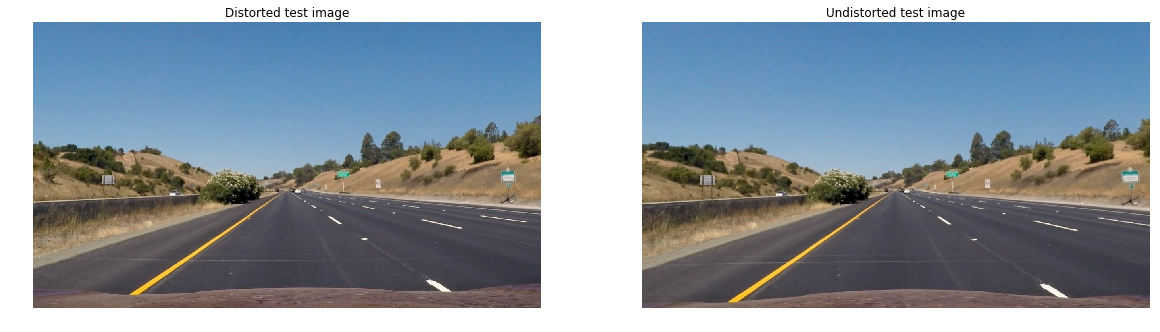

In [77]:
###The distorted test images
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title("Distorted test image")
cv2.imwrite(output+'Distorted_test_image.png',test_images[0])
plt.imshow(test_images[0])
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Undistorted test image")
cv2.imwrite(output+'Undistorted_test_image.png',undistorted_test_images[0])
plt.imshow(undistorted_test_images[0])
plt.axis("off")

In [16]:
####Next I am going to undistort the test images
undistorted_test_images =[]
for img in test_images:
    undistorted_test_images.append(undistort(img))

# Creating a binary picture

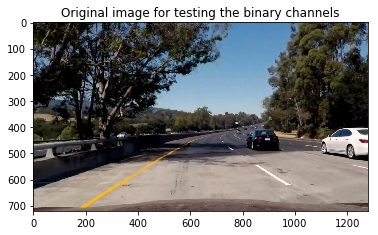

In [20]:
####Now I will try to find out what will be the color transform to create a thresholded binary picture
threshold_test_image_RGB = undistorted_test_images[6]
threshold_test_image_HSV = cv2.cvtColor(threshold_test_image_RGB,cv2.COLOR_RGB2HSV)
threshold_test_image_HLS = cv2.cvtColor(threshold_test_image_RGB,cv2.COLOR_RGB2HLS)
plt.imshow(threshold_test_image_RGB)
plt.title("Original image for testing the binary channels")

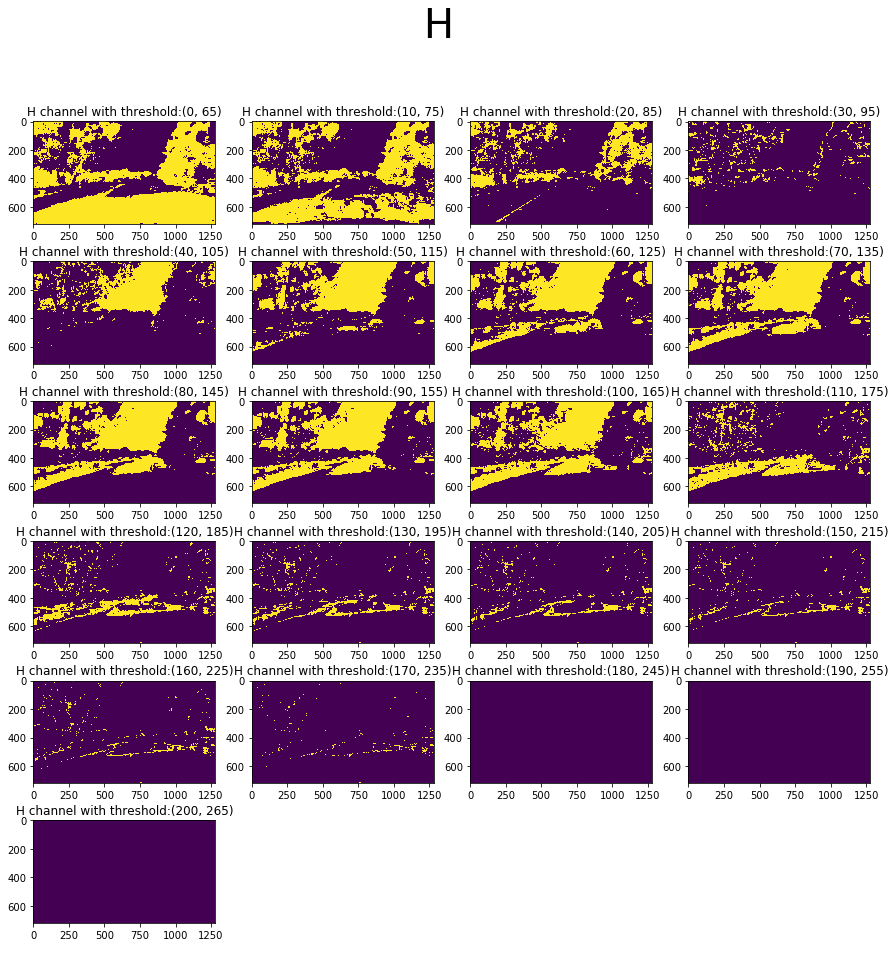

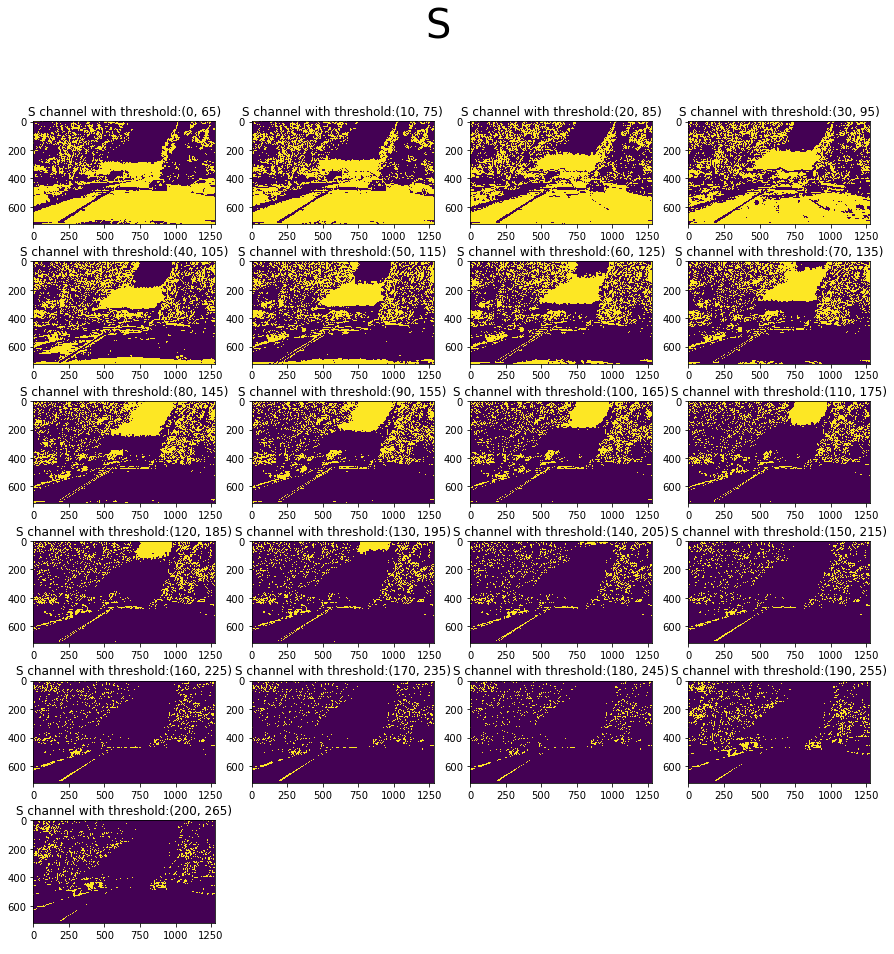

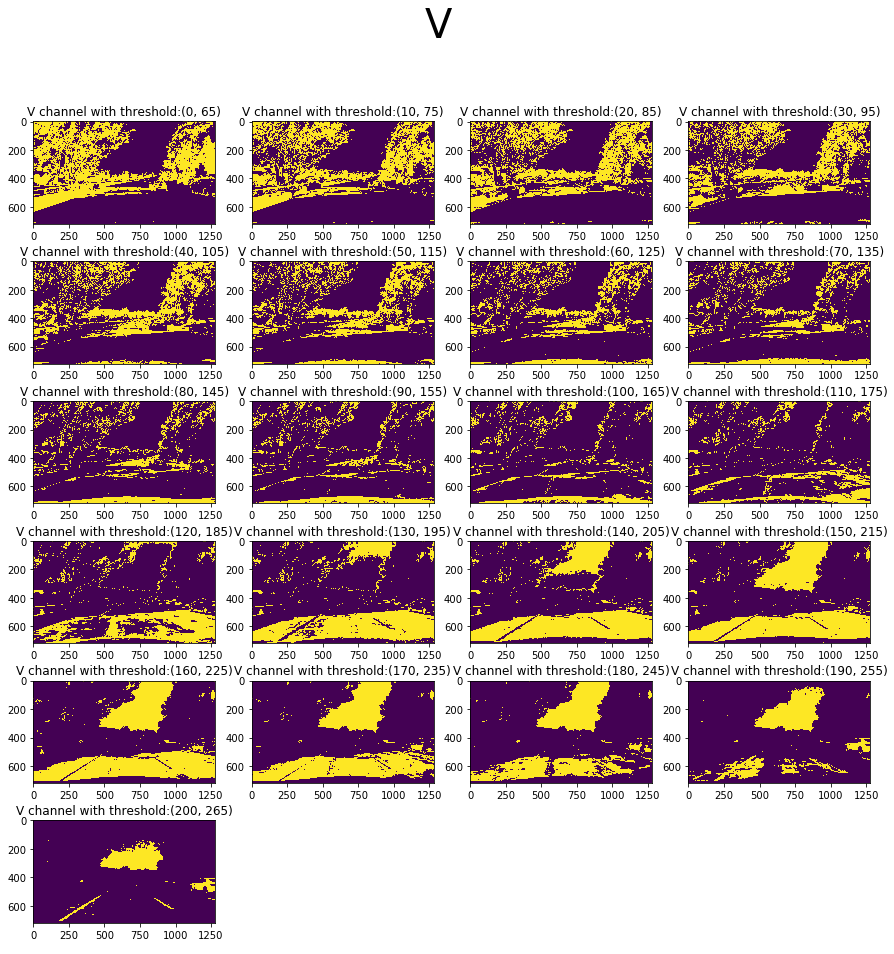

In [25]:
###This helps to show certain thresholds in a picture
###First I will show different thresholds for HSV
H = threshold_test_image_HSV[:,:,0]
S = threshold_test_image_HSV[:,:,1]
V = threshold_test_image_HSV[:,:,2]
colors = [H,S,V]
colors_name=["H","S","V"]
temp=0
for color in colors:
    fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(15,15))
    fig.suptitle(colors_name[temp], fontsize=40)
    
    for i in range(0,21):
        thresh = (0+10*i, 65+10*i)
        binary = np.zeros_like(color)
        binary[(color > thresh[0]) & (color <= thresh[1])] = 1
        plt.subplot(6,4,1+i)
        title = str(colors_name[temp])+" channel with threshold:" + str(thresh)
        plt.title( title, fontsize=12)
        plt.imshow(binary)    
    temp=temp+1
    plt.subplot(6,4,22)
    plt.axis('off')
    plt.subplot(6,4,23)
    plt.axis('off')
    plt.subplot(6,4,24)
    plt.axis('off')
    plt.show


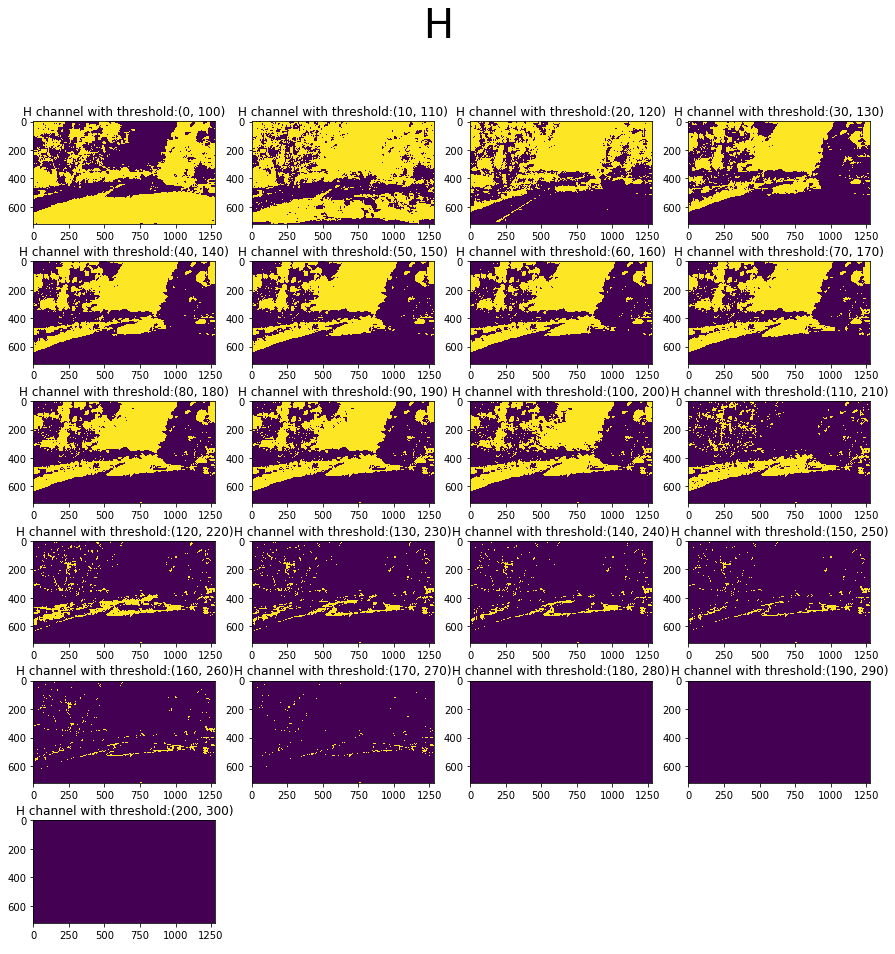

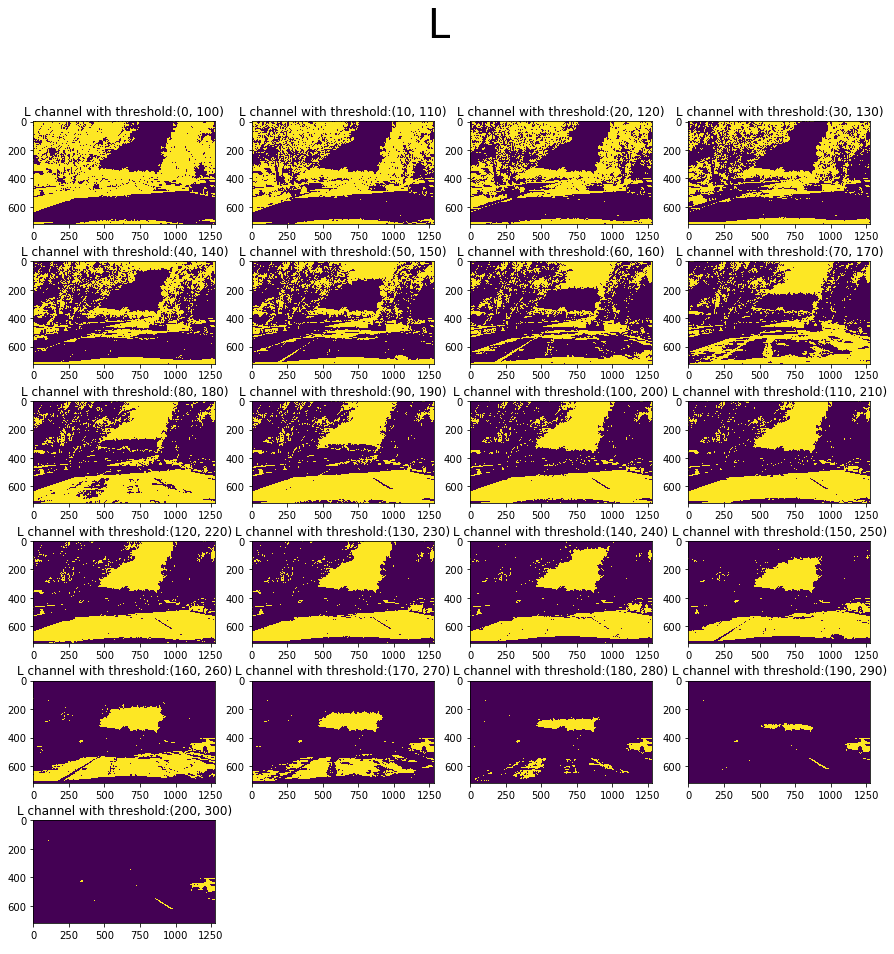

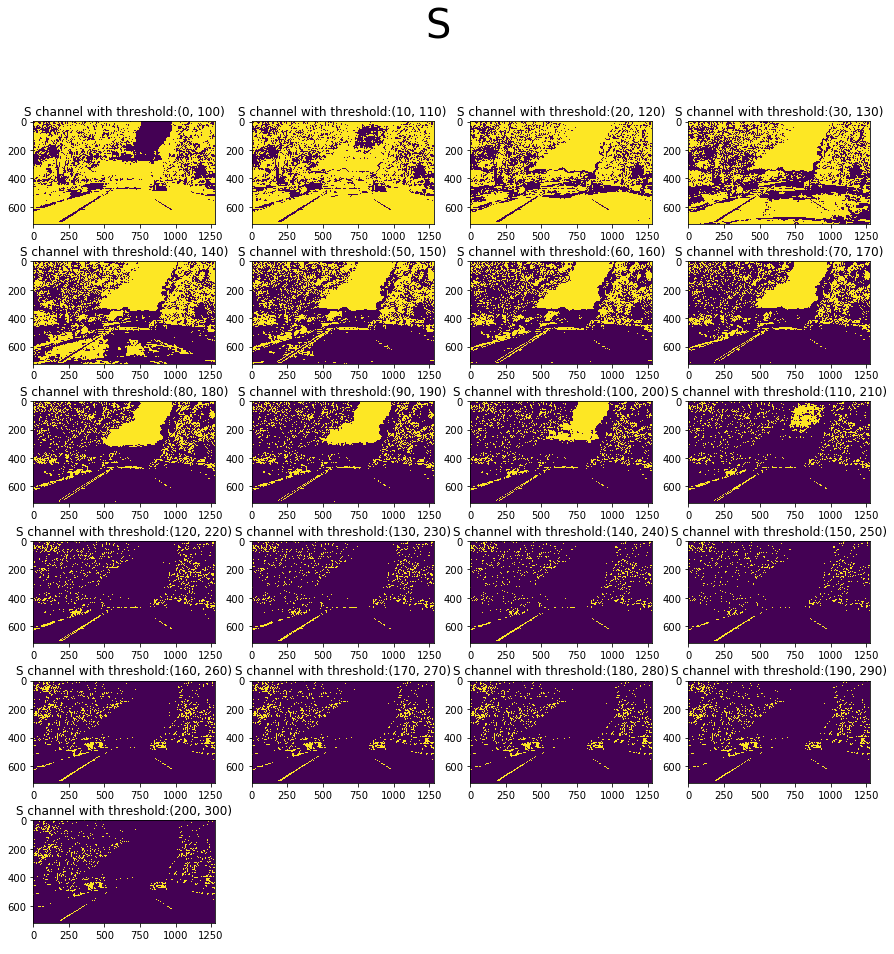

In [28]:
##Now the same with HLS
H = threshold_test_image_HLS[:,:,0]
L = threshold_test_image_HLS[:,:,1]
S = threshold_test_image_HLS[:,:,2]
colors = [H,L,S]
colors_name=["H","L","S"]
temp=0
for color in colors:
    fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(15,15))
    fig.suptitle(colors_name[temp], fontsize=40)
    
    for i in range(0,21):
        thresh = (0+10*i, 100+10*i)
        binary = np.zeros_like(color)
        binary[(color > thresh[0]) & (color <= thresh[1])] = 1
        title = str(colors_name[temp])+" channel with threshold:" + str(thresh)
        plt.subplot(6,4,1+i)
        plt.title( title, fontsize=12)
        plt.imshow(binary) 
    temp=temp+1    
    plt.subplot(6,4,22)
    plt.axis('off')
    plt.subplot(6,4,23)
    plt.axis('off')
    plt.subplot(6,4,24)
    plt.axis('off')    
    plt.show

<function matplotlib.pyplot.show>

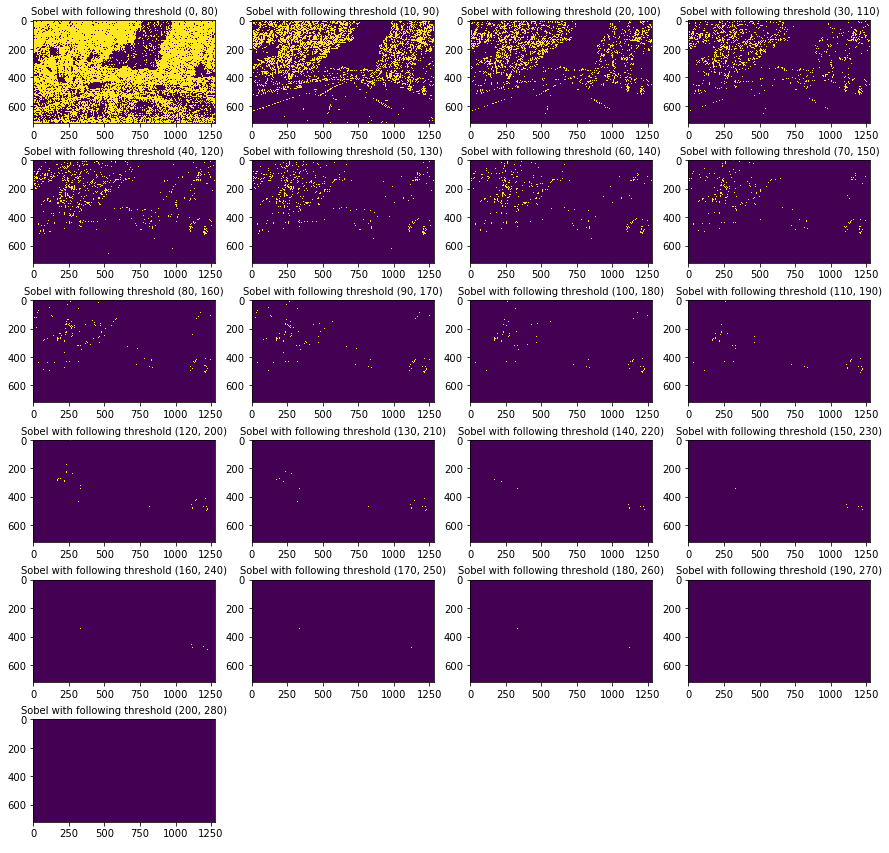

In [31]:
####The sobel operator also delivers good results
sobel_gray = cv2.cvtColor(threshold_test_image_RGB, cv2.COLOR_RGB2GRAY)
sobel_deriv = cv2.Sobel(sobel_gray,cv2.CV_64F,1,0)
sobel_abs = np.absolute(sobel_deriv)
scaled_sobel = np.uint8(255*sobel_abs/np.max(sobel_abs))
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(15,15))
for i in range(0,21):
    thresh = (0+10*i, 80+10*i)
    binary = np.zeros_like(scaled_sobel)
    binary[(scaled_sobel > thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    plt.subplot(6,4,1+i)
    title = "Sobel with following threshold "+ str(thresh)
    plt.title( title, fontsize=10)
    plt.imshow(binary) 
plt.subplot(6,4,22)
plt.axis('off')
plt.subplot(6,4,23)
plt.axis('off')
plt.subplot(6,4,24)
plt.axis('off') 
plt.show

In [32]:
def binary_image(img):
    ###converting imput image to HLS and HSV and extracting the right channel
    HLS_img = cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
    #HSV_img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    #HLS_L_channel = HLS_img[:,:,1]
    HLS_S_channel = HLS_img[:,:,2]
    #HSV_S_channel = HSV_img[:,:,1]
    #HSV_V_channel = HSV_img[:,:,2]
    
    ##converting to sobel
    sobel_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobel_deriv = cv2.Sobel(sobel_gray,cv2.CV_64F,1,0)
    sobel_abs = np.absolute(sobel_deriv)
    scaled_sobel = np.uint8(255*sobel_abs/np.max(sobel_abs))
    
    ###Creating the binary images (however still empty)
    #HLS_L_binary = np.zeros_like(HLS_L_channel)
    HLS_S_binary = np.zeros_like(HLS_S_channel)
    #HSV_S_binary = np.zeros_like(HSV_S_channel)
    #HSV_V_binary = np.zeros_like(HSV_V_channel)
    sobel_binary = np.zeros_like(scaled_sobel)
    
    ###intorducing threshold restrictions
    #HLS_L_binary[(HLS_L_channel >=190) & (HLS_L_channel <= 255)]=1
    HLS_S_binary[(HLS_S_channel >=150) & (HLS_S_channel <= 250)]=1
    #HSV_S_binary[(HSV_S_channel >=150) & (HSV_S_channel <= 215)]=1
    #HSV_V_binary[(HSV_V_channel >=200) & (HSV_V_channel <= 255)]=1
    sobel_binary[(scaled_sobel >=20) & (scaled_sobel <= 100)]=1
    
    ##comining both binary images
    final_binary = np.zeros_like(sobel_binary)
    final_binary[ (HLS_S_binary==1) | (sobel_binary ==1) ] = 1
    
    return final_binary

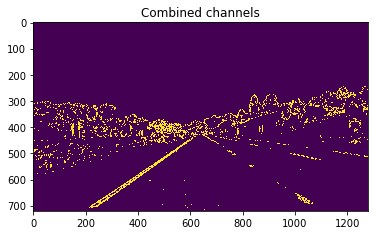

In [79]:
##the proposed channels look really good on all test images
##one example

binary_tester = binary_image(undistorted_test_images[0])
plt.title("Combined channels", fontsize=12)
cv2.imwrite(output+'binary_combined.png',binary_tester)
plt.imshow(binary_tester)

# Warp images

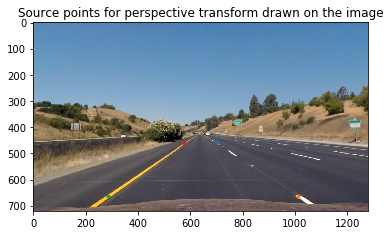

In [80]:
####The next step will be to perform the perspective transform
####For this step it is necessary to identiy for points in the image which form a rectangle
###In my step these points are
img_size  =(undistorted_test_images[0].shape[1],undistorted_test_images[0].shape[0])
##Plot the source points to see if its a good fit
plt.title( "Source points for perspective transform drawn on the image", fontsize=12)
plt.imshow(undistorted_test_images[0])
plt.plot(702,460,'.')
plt.plot(1010,663,'.')
plt.plot(285,663,'.')
plt.plot(576,460,'.')

###Source points
src=np.float32(
[[702,460],
[1010,663],
[285,663],
[576,460]])

##Destination box
dst= np.float32(
[[1000,0],
 [1000,650],
 [200,650],
 [200,0]])


####The plotted points can be seen below

In [81]:
###Apply the perspective transform on the image
def perspective_transform(img):
    M = cv2.getPerspectiveTransform(src,dst)
    Minv = cv2.getPerspectiveTransform(dst,src)
    warped = cv2.warpPerspective(img,M,img_size,flags=cv2.INTER_LINEAR)
    return warped, Minv



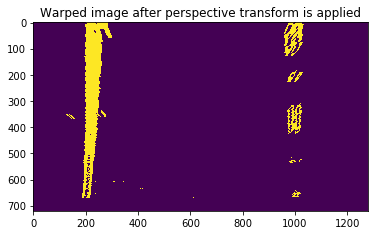

In [82]:
transformed_binary,_ = perspective_transform(binary_tester)
plt.title( "Warped image after perspective transform is applied", fontsize=12)
cv2.imwrite(output+'warped_binary.png',transformed_binary)
plt.imshow(transformed_binary)

# Finding the lane lines

In [83]:
###this is done by the sliding windows technique and in the end will give us a polynomial equation
def find_lanes_initial(img, plot=False):
    histogram = np.sum(img[img.shape[0]//12:,:], axis=0)
    out_img = np.dstack((img,img,img))*255
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])

    rightx_base = np.argmax(histogram[midpoint:])+midpoint

    n_windows = 9

    window_height = np.int(img.shape[0]/n_windows)

    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    leftx_current = leftx_base
    rightx_current = rightx_base

    margin = 100
    minpix = 50

    left_lane_inds =[]
    right_lane_inds = []

    for window in range(n_windows):
        win_y_low = img.shape[0]-(window+1)*window_height
        win_y_high = img.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin

        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0),2)
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 

        good_left_inds = ((nonzeroy >= win_y_low)& (nonzeroy < win_y_high) & 
                          (nonzerox >= win_xleft_low)&(nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]

        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)

        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))

        if len(good_right_inds) > minpix:
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    left_fit_global = np.polyfit(lefty, leftx, 2)
    right_fit_global = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    if plot==True:
        out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
        out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
        plt.imshow(out_img)
        plt.plot(left_fitx, ploty, color='yellow')
        plt.plot(right_fitx, ploty, color='yellow')
        plt.xlim(0, 1280)
        plt.ylim(720, 0)

    return left_fit, right_fit, left_fitx, right_fitx, ploty, leftx, rightx, lefty, righty

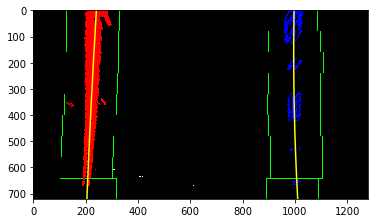

In [90]:
img_example = find_lanes_initial(transformed_binary, plot=True)

In [38]:
def get_curvature(ploty,rightx, righty, leftx, lefty):
    y_eval = np.max(ploty)

    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    # Fit new polynomials to x,y in world space (similiar as below when fitting second order polynomial just
    #adjustig for the pixels)
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
                  
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    
    ##now it is also easy to calculate the distance from the street assuming that the middle of the picture is the middle
    ## at all times (even at sudden bumps in video)

    x_width_in_m = xm_per_pix*1280
    y_height_in_m = ym_per_pix*720
    l_intercept = left_fit_cr[0]*y_height_in_m**2 + left_fit_cr[1]*y_height_in_m + left_fit_cr[2]
    r_intercept= right_fit_cr[0]*y_height_in_m**2 + right_fit_cr[1]*y_height_in_m + right_fit_cr[2]
    
    middle = (r_intercept+l_intercept)/2
    deviation_from_center = (middle - x_width_in_m/2)
    return left_curverad, right_curverad, deviation_from_center



## Faster technique once the lane has been initially  found

In [51]:
def next_lane_line(img,left_fit,right_fit):
# Assume you now have a new warped binary image 
# from the next frame of video (also called "binary_warped")
# It's now much easier to find line pixels!
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
    left_fit[1]*nonzeroy + left_fit[2] + margin))) 

    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
    right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    ##Smoothing the lane
    Lane.add_lane(left_fit, right_fit)    
    if len(Lane.left_fit_list) >= 10:
        left_fit = np.average(Lane.left_fit_list[-10:],axis=0)
        right_fit = np.average(Lane.right_fit_list[-10:],axis=0)
        
    # Generate x and y values for plotting
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    return left_fit, right_fit, left_fitx, right_fitx, ploty, leftx, rightx, lefty, righty

# Draw the lane on line

In [52]:
def draw_lines(binary_warped,output_img, Minv, left_fitx,right_fitx,ploty,left_curvature, right_curvature,distance_center):
   # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(output_img, 1, newwarp, 0.3, 0)
    
    ###write the curvature on the image and distance from middle

    distance= float(distance_center)
    curvature = "Left curvature= "+ str(np.round(left_curvature,1))+" m"+"; Right curvature= "+str(np.round(right_curvature,1))+" m"
    cv2.putText(result,curvature, (50,50), cv2.FONT_HERSHEY_DUPLEX, 1, (255,0,0),2)
    distance = "Distance to Middle= "+ str(np.round(distance,1))+" m"
    cv2.putText(result,distance, (50,90), cv2.FONT_HERSHEY_DUPLEX, 1, (255,0,0),2)
    return result

In [53]:
##Creating the Line class to be able to store the Lane data and smooth the lanes in the video

class Line():
    def __init__(self):
        self.left_fit_list = []
        self.right_fit_list = []
    def add_lane(self,left_fit,right_fit):
        self.left_fit_list.append(left_fit)
        self.right_fit_list.append(right_fit)


In [94]:
## the finished pipeline
left_fit_global = None
right_fit_global = None

def image_pipeline(img):
    ##create global variables to access them after the pipeline has finished one iteration
    ##they are needed later for resuing the other lane detection algorithm
    global left_fit_global
    global right_fit_global

    undistorted = undistort(img)
    binary = binary_image(undistorted)
    transformed,Minv = perspective_transform(binary)
    
    if left_fit_global is None:
        left_fit, right_fit, left_fitx, right_fitx, ploty, leftx, rightx, lefty, righty = find_lanes_initial(transformed, plot=False)
        left_fit_global = left_fit
        right_fit_global = right_fit
    else:
        left_fit, right_fit, left_fitx, right_fitx, ploty, leftx, rightx, lefty, righty =next_lane_line(transformed,left_fit_global,right_fit_global)
        left_fit_global = left_fit
        right_fit_global = right_fit
        
    left_curverad, right_curverad,deviation = get_curvature(ploty,rightx, righty, leftx, lefty)
    return draw_lines(transformed,undistorted, Minv, left_fitx,right_fitx,ploty,left_curverad, right_curverad,deviation)

    
    

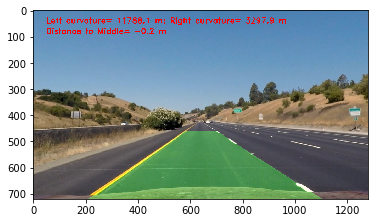

In [93]:
test = image_pipeline(test_images[0])
plt.imshow(test)

In [55]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [95]:
###use same video code as in the first lane project
output = 'output/project_video.mp4'
clip1 = VideoFileClip("project_video.mp4")
Lane = Line()
clip2 = clip1.fl_image(image_pipeline)
%time clip2.write_videofile(output, audio=False)

[MoviePy] >>>> Building video output/project_video.mp4
[MoviePy] Writing video output/project_video.mp4


100%|█████████▉| 1260/1261 [05:29<00:00,  3.79it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output/project_video.mp4 

CPU times: user 7min 44s, sys: 51.6 s, total: 8min 36s
Wall time: 5min 32s


In [504]:
output = 'output/challenge_video.mp4'
clip1 = VideoFileClip("challenge_video.mp4")
Lane = Line()
clip2 = clip1.fl_image(image_pipeline)
%time clip2.write_videofile(output, audio=False)

[MoviePy] >>>> Building video output/challenge_video.mp4
[MoviePy] Writing video output/challenge_video.mp4



 64%|██████▎   | 309/485 [01:11<00:40,  4.35it/s]


100%|██████████| 485/485 [01:54<00:00,  4.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output/challenge_video.mp4 

CPU times: user 2min 44s, sys: 18.8 s, total: 3min 2s
Wall time: 1min 56s


In [56]:
output = 'output/harder_challenge_video.mp4'
clip1 = VideoFileClip("harder_challenge_video.mp4")
Lane = Line()
clip2 = clip1.fl_image(image_pipeline)
%time clip2.write_videofile(output, audio=False)

[MoviePy] >>>> Building video output/harder_challenge_video.mp4
[MoviePy] Writing video output/harder_challenge_video.mp4



100%|█████████▉| 1199/1200 [05:06<00:00,  4.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output/harder_challenge_video.mp4 

CPU times: user 6min 57s, sys: 45.8 s, total: 7min 43s
Wall time: 5min 10s
